In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [30]:
import tensorflow as tf
with tf.device("/gpu:0"):
    a = tf.constant(10)
    b = tf.constant(5)
    add = a + b
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("a+b:", sess.run(add))

a+b: 15


In [31]:
# Load the data
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

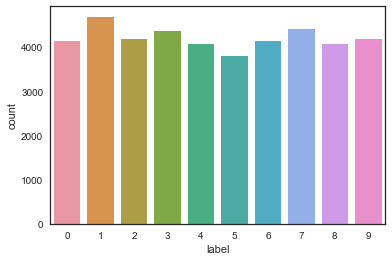

In [32]:
Y_train = train["label"]

X_train = train.drop(labels=["label"],axis = 1)
del train

g = sns.countplot(Y_train)
Y_train.value_counts()

In [33]:
X_train.isnull().describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000,...,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000,...,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000


In [34]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [41]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [42]:
Y_train = to_categorical(Y_train, num_classes=10)

In [43]:
# Set the random seed
random_seed = 2
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

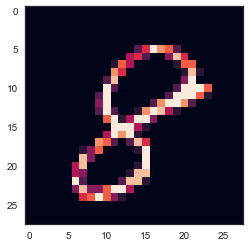

In [54]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

In [56]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(5,5),padding='Same',
        activation='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


In [57]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [58]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [59]:
epochs = 10 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [60]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
         validation_data = (X_val, Y_val), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
130s - loss: 0.3727 - acc: 0.8804 - val_loss: 0.0988 - val_acc: 0.9688
Epoch 2/10
15s - loss: 0.1313 - acc: 0.9599 - val_loss: 0.0748 - val_acc: 0.9748
Epoch 3/10
16s - loss: 0.0987 - acc: 0.9701 - val_loss: 0.0586 - val_acc: 0.9793
Epoch 4/10
15s - loss: 0.0862 - acc: 0.9747 - val_loss: 0.0488 - val_acc: 0.9848
Epoch 5/10
16s - loss: 0.0730 - acc: 0.9778 - val_loss: 0.0439 - val_acc: 0.9850
Epoch 6/10
16s - loss: 0.0661 - acc: 0.9794 - val_loss: 0.0418 - val_acc: 0.9860
Epoch 7/10
16s - loss: 0.0632 - acc: 0.9804 - val_loss: 0.0494 - val_acc: 0.9836
Epoch 8/10
15s - loss: 0.0578 - acc: 0.9824 - val_loss: 0.0365 - val_acc: 0.9888
Epoch 9/10
16s - loss: 0.0565 - acc: 0.9829 - val_loss: 0.0359 - val_acc: 0.9886
Epoch 10/10
15s - loss: 0.0511 - acc: 0.9846 - val_loss: 0.0351 - val_acc: 0.9900


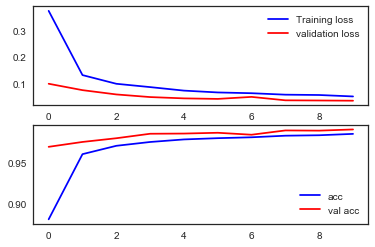

In [74]:
fig, ax = plt.subplots(2,1)
history.history.keys()
ax[0].plot(history.history['loss'],color='b',label='Training loss')
ax[0].plot(history.history['val_loss'],color='r',label='validation loss')
ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['acc'],color='b',label='acc')
ax[1].plot(history.history['val_acc'],color='r',label='val acc')
ax[1].legend(loc='best', shadow=True)

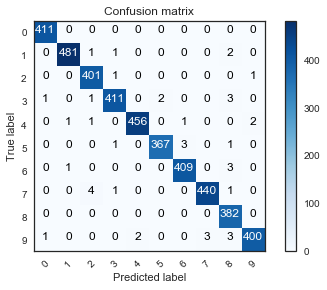

In [84]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
Y_pred = model.predict(X_val)
Y_pred
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_val, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [86]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")


0        2
1        0
2        9
3        0
4        3
5        7
6        0
7        3
8        0
9        3
10       5
11       7
12       4
13       0
14       4
15       3
16       3
17       1
18       9
19       0
20       9
21       1
22       1
23       5
24       7
25       4
26       2
27       7
28       4
29       7
        ..
27970    5
27971    0
27972    4
27973    8
27974    0
27975    3
27976    6
27977    0
27978    1
27979    9
27980    3
27981    1
27982    1
27983    0
27984    4
27985    5
27986    2
27987    2
27988    9
27989    6
27990    7
27991    6
27992    1
27993    9
27994    7
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [88]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
type(submission)

pandas.core.frame.DataFrame

In [90]:
r = model.evaluate(X_val,Y_val)


4200/4200 [==============================] - 0s     


In [93]:
r

[0.035099252012192404, 0.98999999999999999]

In [94]:
from keras.models import load_model
model.save("myModel")
del model

In [95]:
model = load_model("myModel")

In [ ]:
model.summary